In [1]:
import pandas as pd
import numpy as np

cocktails_df = pd.read_csv('cocktails_cleaned.csv', index_col=0).replace(
    np.nan, '?')

print(cocktails_df.shape, '\n\n', cocktails_df.columns)

cocktails_df

(2341, 65) 

 Index(['master_recipe_id', 'id', 'name', 'edition_year', 'ingredient_id_0',
       'recipe_ingredient_type_0', 'measurement_id_0', 'amount_0',
       'ingredient_id_1', 'recipe_ingredient_type_1', 'measurement_id_1',
       'amount_1', 'ingredient_id_2', 'recipe_ingredient_type_2',
       'measurement_id_2', 'amount_2', 'ingredient_id_3',
       'recipe_ingredient_type_3', 'measurement_id_3', 'amount_3',
       'ingredient_id_4', 'recipe_ingredient_type_4', 'measurement_id_4',
       'amount_4', 'ingredient_id_5', 'recipe_ingredient_type_5',
       'measurement_id_5', 'amount_5', 'ingredient_id_6',
       'recipe_ingredient_type_6', 'measurement_id_6', 'amount_6',
       'ingredient_id_7', 'recipe_ingredient_type_7', 'measurement_id_7',
       'amount_7', 'ingredient_id_8', 'recipe_ingredient_type_8',
       'measurement_id_8', 'amount_8', 'ingredient_id_9',
       'recipe_ingredient_type_9', 'measurement_id_9', 'amount_9',
       'ingredient_id_10', 'recipe_ingredient_ty

,master_recipe_id,id,name,edition_year,ingredient_id_0,recipe_ingredient_type_0,measurement_id_0,amount_0,ingredient_id_1,recipe_ingredient_type_1,...,amount_12,ingredient_id_13,recipe_ingredient_type_13,measurement_id_13,amount_13,ingredient_replacement_suggestions,instructions,glass_id,notes,year_introduced
0,1.0,1,Whiskey Cocktail,2012,1.0,Main,1.0,1,2,Main,...,?,?,?,?,?,?,Fill one-third full of fine ice; shake and str...,34,"*Bourbon, Blended, Rye or Canadian.",1935
1,4.0,4,Martinez Cocktail,2012,11.0,Main,2.0,1,12,Main,...,?,?,?,?,?,This strong but balanced cocktail calls for a ...,"Shake up thoroughly, and strain into a large c...",44,The Martinez is a tricky cocktail to pin down....,1935
2,5.0,5,Traditional Martini (Sweet),2012,16.0,Main,4.0,1,9,Main,...,?,?,?,?,?,?,Stir with ice and strain into chilled cocktail...,44,"From this we can see that the Martini, contain...",1988
3,6.0,6,Traditional Martini (Dry),2012,16.0,Main,4.0,1,19,Main,...,?,?,?,?,?,"It's hand crafted, and small batch quality, pa...",Stir with ice and strain into chilled cocktail...,44,"From this we can see that the Martini, contain...",2012
4,7.0,7,Margarita,2012,25.0,Main,4.0,1 1/2,26,Main,...,?,?,?,?,?,Monte Alban Silver is an excellent choice of t...,Rim chilled cocktail glass with lime and salt....,44,The origins of the Margarita are positively sh...,1960
5,8.0,8,Daiquiri,2012,23.0,Main,4.0,2,24,Main,...,?,?,?,?,?,"The daiquiri is one of the original ""sour' coc...",Shake with ice and strain into a chilled cockt...,44,Cuba holds a special place in history for many...,1957
6,9.0,9,Sidecar,2012,20.0,Main,4.0,1,21,Main,...,?,?,?,?,?,Meukow's rich aromas of baked spices and fruit...,Shake with ice and strain into a chilled cockt...,44,Supposedly the Sidecar originated at the Ritz ...,1935
7,11.0,625,Mai-Tai (Trader Vic Version),2012,34.0,Main,4.0,2,35,Main,...,?,?,?,?,?,?,Shake ingredients without ice. Strain into ice...,27,"The Mai-Tai is a bit of a drama queen, to be h...",1964
8,13.0,13,Accoutrement,2012,44.0,Main,4.0,1 1/2,45,Main,...,?,?,?,?,?,?,Shake with ice and strain into chilled cocktai...,44,?,2012
9,14.0,14,"The ""23""",2012,49.0,Garnish,0.0,1,50,Main,...,?,?,?,?,?,World famous Peychaud’s Bitters were created b...,Rim chilled cocktail glass with lemon and suga...,44,?,2012


In [2]:
def clean_mixed_number(string):
    if string != '?':
        return ''.join(c for c in string if c.isdigit()
                       or c is '/' or c is '.' or c is ' ')
    else:
        return '?'

def parse_fraction(fraction):
    def parse_part(part):
        sections = part.split('/')
        if len(sections) == 1:
            return float(sections[0])
        return float(sections[0]) / float(sections[1])
    if fraction != '?':
        return sum(parse_part(part) for part in fraction.split())
    else:
        return '?'

amount_cols_to_clean = ['amount_' + str(i) for i in range(11)]
for col in amount_cols_to_clean:
    cocktails_df[col] = cocktails_df[col].apply(clean_mixed_number)
    cocktails_df[col] = cocktails_df[col].apply(parse_fraction)
    
ingredients_melted = pd.DataFrame(columns=['id', 'ingredient_id', 'amount'])
for i in range(14):
    ingredient_id_i = 'ingredient_id_' + str(i)
    amount_i = 'amount_' + str(i)
    ingredients_i = cocktails_df.melt(id_vars=['id', ingredient_id_i],
                                      value_vars=[amount_i], 
                                      value_name='amount').drop(
        columns='variable').rename(columns={ingredient_id_i: 'ingredient_id'})
    ingredients_melted = ingredients_melted.append(ingredients_i,
                                                   ignore_index=True)    
ingredients_melted = ingredients_melted.replace('?', np.nan)

ingredients_melted['ingredient_id'] = ingredients_melted[
    'ingredient_id'].replace({2091: 165, 2434: 165, 2183: 2182, 2484: 2182,
                              2188: 2412, 2486: 2412, 2067: 16, 2437: 16,
                              2210: 16, 2351: 16, 2156: 16, 2081: 2376,
                              2491: 2376, 2496: 2376, 58: 2376, 2080: 1,
                              2162: 7, 2163: 618, 1023: 618, 2194: 8,
                              2206: 613, 573: 613, 656: 613, 2208: 618,
                              2349: 618, 2264: 618, 2324: 618,
                              2343: 618, 2242: 1, 2260: 779, 277: 16, 
                              65: 2376, 763: 613, 373: 1, 355: 577,
                              563: 618, 570: 8, 602: 7, 713: 8, 950: 1,
                              760: 577, 706: 651, 971: 1, 2071: 547,
                              2372: 926, 946: 926, 2150: 63, 2254: 63,
                              2431: 63, 2539: 63, 759: 368, 2166: 21,
                              2432: 21, 2255: 21, 413: 26, 2153: 75, 2441: 75,
                              2151: 702, 2452: 399, 470: 399, 30: 35,
                              2447: 57, 107: 57, 167: 57, 2247: 57, 2253: 57,
                              2180: 1016, 2461: 1016, 126: 1016, 2499: 1016,
                              1018: 1016, 2171: 668, 2176: 668, 2177: 668,
                              2450: 668, 91: 668, 105: 668, 2189: 20,
                              2436: 20, 2278: 20, 2498: 20, 166: 20, 2187: 68,
                              2442: 68, 100: 68, 2244: 102, 2443: 102,
                              2566: 163, 113: 163, 1017: 52, 977: 52, 55: 715,
                              2165: 715, 2157: 715, 2246: 715, 2160: 715,
                              2158: 715, 2444: 715, 2495: 715, 748: 715,
                              2152: 250, 2248: 250, 2438: 250, 710: 250,
                              716: 250, 2076: 2123, 2172: 2123, 2072: 2377,
                              2147: 2377, 2197: 2377, 2282: 2377, 2435: 2377,
                              2494: 2377, 2479: 2377, 82: 2377, 694: 2377,
                              115: 2377, 334: 2366, 2445: 2366, 79: 2366,
                              2077: 189, 2173: 189, 2084: 23, 2217: 23, 
                              2223: 2532, 2238: 23, 2202: 23, 2440: 23,
                              2465: 2532, 2459: 23, 2482: 23, 2419: 23,
                              981: 23, 538: 23, 2262: 23, 255: 23, 
                              2205: 23, 2268: 23, 509: 23, 280: 435,
                              117: 146, 2284: 146, 2340: 146, 2469: 146,
                              2483: 146, 354: 146, 34: 146, 285: 146,
                              2155: 38, 2241: 2361, 2439: 2361, 469: 2361,
                              2250: 2371, 2455: 2371, 2274: 2407, 2471: 2407,
                              2311: 2379, 2462: 2379, 477: 2506, 2233: 2389,
                              2300: 2389, 2476: 2389, 2243: 711, 2252: 711,
                              2318: 711, 717: 2517, 2249: 148, 2454: 148,
                              2458: 148, 703: 148, 2549: 148, 2309: 408, 
                              2478: 408, 2263: 83, 921: 83, 2294: 149,
                              720: 149, 2430: 352, 2448: 545, 705: 545,
                              2449: 467, 2475: 2513, 2538: 964, 2433: 16,
                              28: 146, 2104: 430, 24: 430, 2561: 430,
                              32: 430, 2103: 761, 2363: 761, 2146: 2052,
                              2167: 2052, 2232: 2052})

ingredients_df = pd.read_csv('ingredients.csv', index_col=0)
ingredients_dict = pd.Series(ingredients_df['name'].values, 
    index=ingredients_df['id']).to_dict()
ingredients_melted['ingredient_id'] = ingredients_melted['ingredient_id'].map(
    ingredients_dict)

ingredients = pd.pivot_table(ingredients_melted, values='amount',
                             columns='ingredient_id', index='id'
                            ).reset_index().rename_axis('', axis='columns')

cocktails_df_cleaned = pd.concat([cocktails_df[['name']], ingredients,
                                  cocktails_df['year_introduced']], axis=1
                                ).drop(columns='id').replace(np.nan, 0)

def bin_year_introduced(year_introduced):
    if year_introduced < 1957:
        return '(a) Before 1957'
    if 1957 <= year_introduced < 1978:
        return '(b) 1957 to 1974'
    if 1978 <= year_introduced < 2012:
        return '(c) 1975 to 2000'
    if year_introduced >= 2012:
        return '(d) After 2000'
    
cocktails_df_cleaned['era_introduced'] = cocktails_df_cleaned[
    'year_introduced'].apply(bin_year_introduced)        
cocktails_df_cleaned = cocktails_df_cleaned.drop(
    columns=['year_introduced', 'Ice'])

cocktails_df_cleaned

,name,100-proof Vodka,7-Up,750 ml bottle Claret,750 ml. bottle Burgundy Wine,Absinthe,Absinthe Substitute,Absinthe or pastis,"Absinthe, Herbsaint, or Pernod",Acai berry,...,"orange, lemon, and a cherry",orgeat or almond syrup,peach schnapps,pineapple stick,pomegranate molasses (available at Middle Eastern grocers),seedless raisins,"tiki bitters, such as Bittermen's Elemakule",unbroken egg yolk,white wine,era_introduced
0,Whiskey Cocktail,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(a) Before 1957
1,Martinez Cocktail,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(a) Before 1957
2,Traditional Martini (Sweet),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(c) 1975 to 2000
3,Traditional Martini (Dry),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(d) After 2000
4,Margarita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(b) 1957 to 1974
5,Daiquiri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(b) 1957 to 1974
6,Sidecar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(a) Before 1957
7,Mai-Tai (Trader Vic Version),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(b) 1957 to 1974
8,Accoutrement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(d) After 2000
9,"The ""23""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(d) After 2000


In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cocktails_df_cleaned)

print(train.shape, test.shape)

(1755, 929) (586, 929)


In [4]:
from sklearn.metrics import accuracy_score

target = 'era_introduced'

X_train = train.drop(columns=[target, 'name'])
X_test = test.drop(columns=[target, 'name'])

y_train = train[target]
y_test = test[target]

majority_class = y_train.mode()[0]

y_pred = [majority_class] * len(y_train)

accuracy_score(y_train, y_pred)

0.27350427350427353

Fitting estimator with 927 features.
Fitting estimator with 877 features.
Fitting estimator with 827 features.
Fitting estimator with 777 features.
Fitting estimator with 727 features.
Fitting estimator with 677 features.
Fitting estimator with 627 features.
Fitting estimator with 577 features.
Fitting estimator with 527 features.
Fitting estimator with 477 features.
Fitting estimator with 427 features.
Fitting estimator with 377 features.
Fitting estimator with 327 features.
Fitting estimator with 277 features.
Fitting estimator with 227 features.
Fitting estimator with 177 features.
Fitting estimator with 127 features.
Fitting estimator with 77 features.
[0]	validation_0-merror:0.59943	validation_1-merror:0.6843
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.57151	validation_1-merror:0.680887
[2]	validation_0-merror:0.555556	validation_1-merror

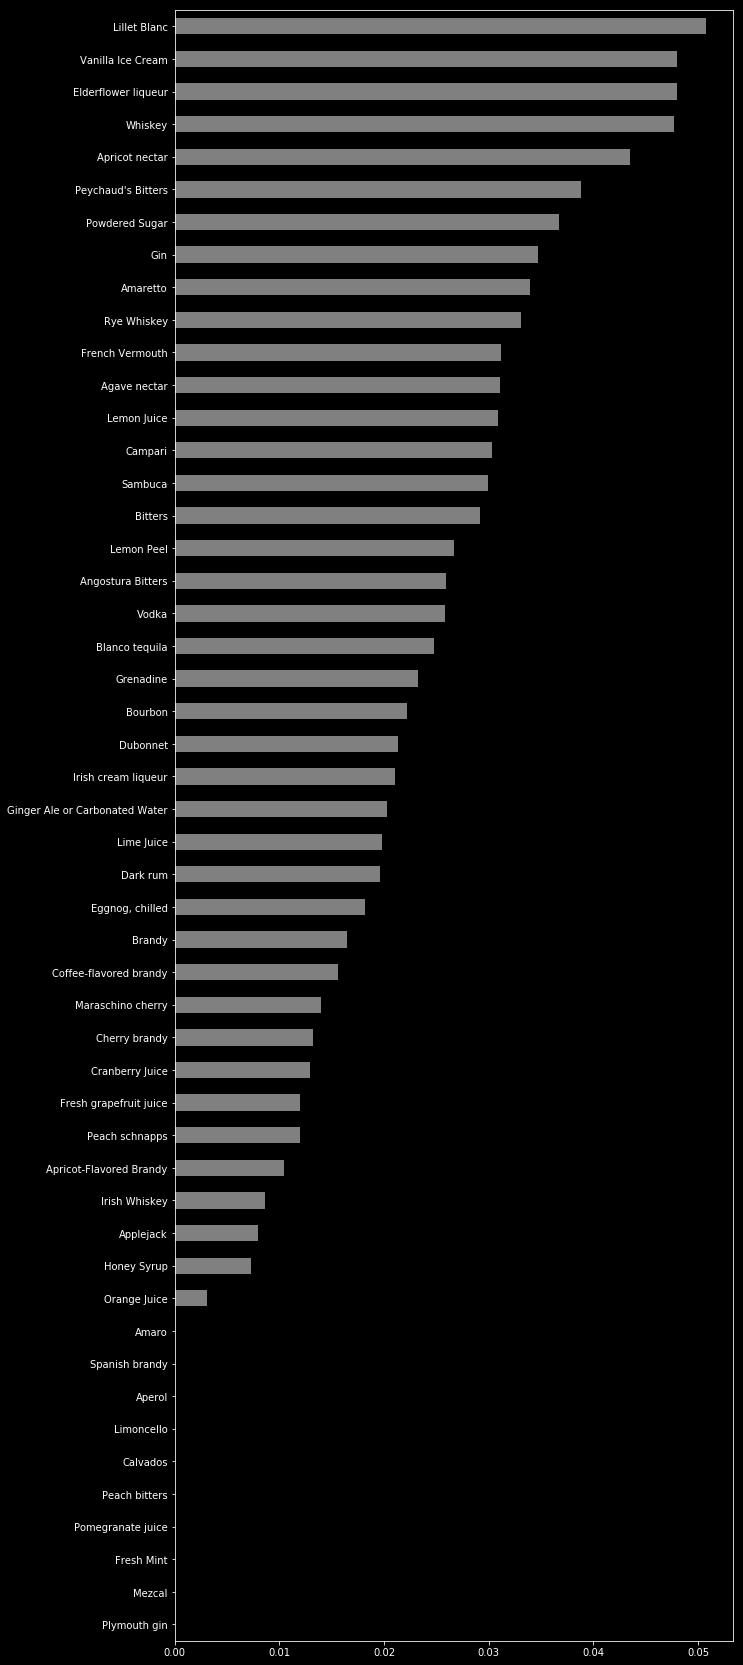

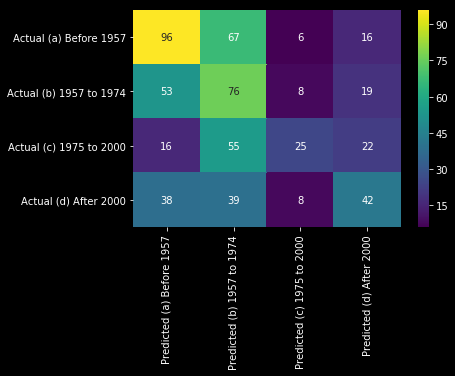

In [6]:
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
import seaborn as sns

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = XGBClassifier(n_estimators=100, n_jobs=-1)
rfe = RFE(classifier, step=50, n_features_to_select=50, verbose=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

eval_set = [(X_train_rfe, y_train), 
            (X_test_rfe, y_test)]

classifier.fit(X_train_rfe, y_train, early_stopping_rounds=10,
               eval_metric='merror', eval_set=eval_set)

y_pred = classifier.predict(X_test_rfe)

print('\nTrain Accuracy Score:', classifier.score(X_train_rfe, y_train))
print('Test Accuracy Score:', classifier.score(X_test_rfe, y_test))

coefficients = pd.Series(
    classifier.feature_importances_, X_train.columns[rfe.support_])
plt.style.use('dark_background')
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');
plt.show()

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}'  for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_test, y_pred);